In [1]:
#####################################################################
# Examples below are (more or less) taken from 
# “Python for Data Analysis" by William Wesley McKinney (O’Reilly).
# Copyright 2012 William McKinney, 978-1-449-31979-3.
#
# TOPICS COVERED:
# - Date & Time Data Types
# - Time Series Basics
# - Time Zone Handling
# - Periods
# - Resampling and Frequency Conversion
# - Time Series Plotting
#####################################################################

# This notebook is written in Python 3.

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy import nan as NA

## Date & Time Data Types

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()  # current time
print(now)
print(now.year, now.month, now.day)

2015-11-10 23:06:09.347695
2015 11 10


In [5]:
# can add/subtract times
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days, delta.seconds)

926 days, 15:45:00
926 56700


In [7]:
# more examples of add/subtract/multiply
from datetime import timedelta
start = datetime(2011, 1, 7)
print(start + timedelta(12))
print(start + 2 * timedelta(12))

2011-01-19 00:00:00
2011-01-31 00:00:00


In [11]:
# datetime to string
print(str(start))
print(start.strftime('%Y-%m-%d'))

2011-01-07 00:00:00
2011-01-07


In [14]:
# string to datetime
value = '2015-11-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2015, 11, 3, 0, 0)

In [17]:
# for common formats, can use dateutil's parser.parse
from dateutil.parser import parse
print(parse('2011-01-02'))
print(parse('Jan 31, 2015, 10:45 AM'))
print(parse('6/12/2011', dayfirst=True))  # if the day comes before the month

2011-01-02 00:00:00
2015-01-31 10:45:00
2011-12-06 00:00:00


In [19]:
# For pandas, use to_datetime to convert strings to datetime
datestrs = ['7/6/2011', '8/6/2011']
print(pd.to_datetime(datestrs))
print(pd.to_datetime(datestrs + [NA]))  # NaT is pandas's NA value for timestamps

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)


## Time Series Basics

In [24]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
print(ts)
print(ts.index.dtype)

2011-01-02    1.713790
2011-01-05   -0.679396
2011-01-07   -1.425007
2011-01-08    0.867405
2011-01-10    1.300721
2011-01-12   -0.691863
dtype: float64
datetime64[ns]


In [25]:
ts['1/10/2011']  # can reference directly (note that the exact string doesn't match)

1.3007205212033872

In [27]:
# For long time series, a year or only a year & month can be passed in
# to select slices of data
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
print(longer_ts.head(3))
print(longer_ts.tail(3))

2000-01-01   -1.665199
2000-01-02   -0.817144
2000-01-03   -0.431598
Freq: D, dtype: float64
2002-09-24   -1.127140
2002-09-25   -0.842726
2002-09-26    0.144689
Freq: D, dtype: float64


In [29]:
print(len(longer_ts['2001']))
print(len(longer_ts['2001-01']))

365
31


In [30]:
longer_ts['2000-02-01':'2000-02-07']  # endpoints included

2000-02-01   -0.317186
2000-02-02   -0.157054
2000-02-03   -0.162598
2000-02-04   -0.043542
2000-02-05   -0.549256
2000-02-06    0.310391
2000-02-07   -0.640966
Freq: D, dtype: float64

In [33]:
# Time series with duplicate indices
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
print(dup_ts)
print(dup_ts.index.is_unique)  # this tells us index is not unique

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64
False


In [34]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [36]:
# Use resample to convert a time series to fixed frequency
print(ts)
print(ts.resample('D'))  # one row for each day

2011-01-02    1.713790
2011-01-05   -0.679396
2011-01-07   -1.425007
2011-01-08    0.867405
2011-01-10    1.300721
2011-01-12   -0.691863
dtype: float64
2011-01-02    1.713790
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.679396
2011-01-06         NaN
2011-01-07   -1.425007
2011-01-08    0.867405
2011-01-09         NaN
2011-01-10    1.300721
2011-01-11         NaN
2011-01-12   -0.691863
Freq: D, dtype: float64


In [44]:
# pd.date_range
print(pd.date_range('2000-01-01', '2000-01-04'))
print(pd.date_range(start='2000-01-01', periods=3))             # 3 periods (daily)
print(pd.date_range(start='2000-01-01', periods=3, freq='H'))   # 3 periods (hourly)
print(pd.date_range(start='2000-01-01', periods=3, freq='6H'))  # 3 periods (6-hourly)
print(pd.date_range(start='2000-01-01', periods=3, freq='1h30min'))  # 3 periods (1.5-hourly)
print(pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI'))  # 3rd Friday of each month

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 06:00:00',
               '2000-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='6H')
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00'],
              dtype='datetime64[ns]', freq='90T')
DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


In [47]:
# shift data back and forth
ts = Series(np.random.randn(4)**2,
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
print(ts.shift(2))

2000-01-31    0.000363
2000-02-29    0.785459
2000-03-31    2.870457
2000-04-30    0.114722
Freq: M, dtype: float64
2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.000363
2000-04-30    0.785459
Freq: M, dtype: float64


In [48]:
# common use of shift is to compute percent changes
ts / ts.shift(1) - 1

2000-01-31            NaN
2000-02-29    2164.730609
2000-03-31       2.654497
2000-04-30      -0.960033
Freq: M, dtype: float64

In [49]:
# if frequency is known, timestamps can be shifted (instead of the data) so that
# no data is lost
ts.shift(2, freq='M')

2000-03-31    0.000363
2000-04-30    0.785459
2000-05-31    2.870457
2000-06-30    0.114722
Freq: M, dtype: float64

## Time Zone Handling

In [51]:
# timezone info in python is in pytz library
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [52]:
# pytz.timezone to get time zone object
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [54]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.298841
2012-03-10 09:30:00    0.626037
2012-03-11 09:30:00   -1.998264
2012-03-12 09:30:00   -0.101267
2012-03-13 09:30:00    0.146820
2012-03-14 09:30:00   -1.356152
Freq: D, dtype: float64

In [57]:
# by default, time series in pandas are "time zone naive"
print(ts.index.tz)

# use tz_localize to give it a timezone
ts_utc = ts.tz_localize('UTC')
print(ts_utc.index.tz)

None
UTC


In [56]:
# data ranges can be generated with timezones
pd.date_range('3/9/2012 9:30', periods=5, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [59]:
# convert to a different timezone
print(ts_utc)
print(ts_utc.tz_convert('US/Eastern'))  # notice that it straddles a DST transition

2012-03-09 09:30:00+00:00   -0.298841
2012-03-10 09:30:00+00:00    0.626037
2012-03-11 09:30:00+00:00   -1.998264
2012-03-12 09:30:00+00:00   -0.101267
2012-03-13 09:30:00+00:00    0.146820
2012-03-14 09:30:00+00:00   -1.356152
Freq: D, dtype: float64
2012-03-09 04:30:00-05:00   -0.298841
2012-03-10 04:30:00-05:00    0.626037
2012-03-11 05:30:00-04:00   -1.998264
2012-03-12 05:30:00-04:00   -0.101267
2012-03-13 05:30:00-04:00    0.146820
2012-03-14 05:30:00-04:00   -1.356152
Freq: D, dtype: float64


## Periods

In [60]:
# periods represent time spans
# p below represents full timespan from 1 Jan 2007 to 31 Dec 2007
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [61]:
p + 5

Period('2012', 'A-DEC')

In [62]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [63]:
# convert an annual period to a month period
print(p.asfreq('M', how='start'))  # at start of year
print(p.asfreq('M', how='end'))    # at end of year

2007-01
2007-12


In [68]:
# convert timestamps to periods
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
print(ts)
pts = ts.to_period()
print(pts)

# convert back to timestamps
print(pts.to_timestamp(how='end'))

2000-01-31    0.000350
2000-02-29   -2.208299
2000-03-31    0.335081
Freq: M, dtype: float64
2000-01    0.000350
2000-02   -2.208299
2000-03    0.335081
Freq: M, dtype: float64
2000-01-31    0.000350
2000-02-29   -2.208299
2000-03-31    0.335081
Freq: M, dtype: float64


# Resampling and Frequency Conversion

In [70]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
print(ts.resample('M', how='mean'))  # group into months, take the mean of data
print(ts.resample('M', how='mean', kind='period'))  # as above, but index is a period

2000-01-31   -0.197392
2000-02-29    0.201976
2000-03-31   -0.121593
2000-04-30   -0.067534
Freq: M, dtype: float64
2000-01   -0.197392
2000-02    0.201976
2000-03   -0.121593
2000-04   -0.067534
Freq: M, dtype: float64


In [71]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [74]:
# Sum of 5-min chunks: [0:00, 5:00), [5:00, 10:00), ...
print(ts.resample('5min', how='sum'))
print(ts.resample('5min', how='sum', closed='left'))  # same as above

# Sum of 5-min chunks: (0:00, 5:00], (5:00, 10:00], ...
print(ts.resample('5min', how='sum', closed='right'))

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64
2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64
1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64


In [75]:
# Open-High-Low-Close (usually for financial data)
ts.resample('5min', how='ohlc')

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## Time Series Plotting

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
close_px_all = pd.read_csv('Datasets/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
print(len(close_px))
close_px.head(5)

2292


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


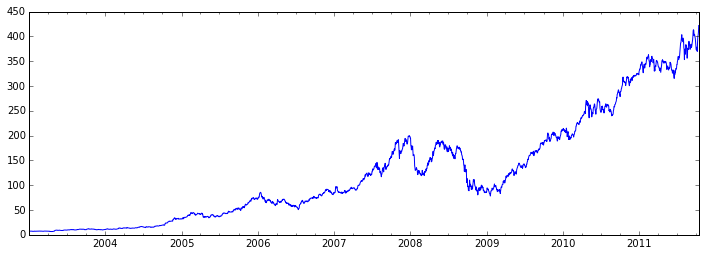

In [90]:
# plot historical price for AAPL
plt.figure(figsize=(12,4))
close_px['AAPL'].plot()
plt.show()

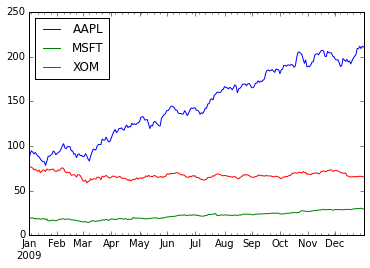

In [93]:
# plot 2009 prices
close_px.ix['2009'].plot()

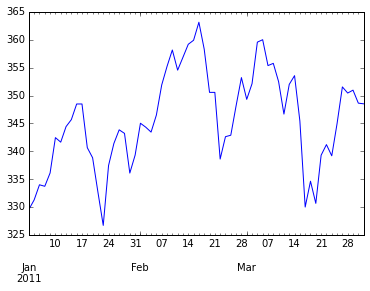

In [94]:
# AAPL stock price for 3 months (Jan-Mar 2011)
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

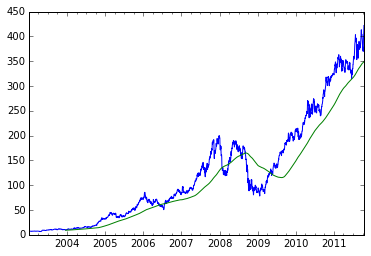

In [97]:
# rolling mean
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()  # 250-day moving average
plt.show()

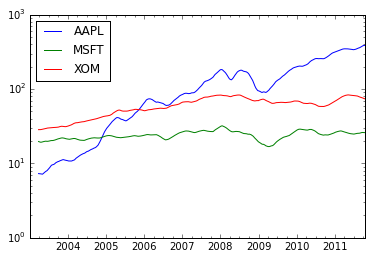

In [99]:
# 60-day rolling mean with log-scale for y-axis
pd.rolling_mean(close_px, 60).plot(logy=True)
plt.show()

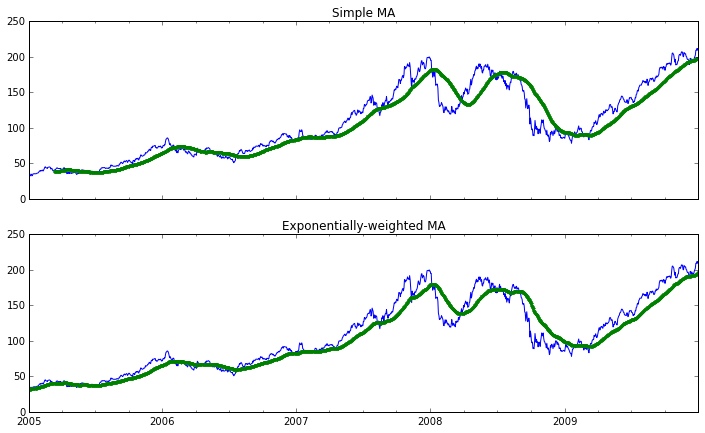

In [105]:
# can also do exponentially-weighted functions
fig, axes = plt.subplots(nrows=2, ncols=1,
                         sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']
ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='b-', ax=axes[0])
ma60.plot(style='g.', ax=axes[0])
aapl_px.plot(style='b-', ax=axes[1])
ewma60.plot(style='g.', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')
plt.show()